# PGP AI - AI and Machine Learning Capstone Project

DESCRIPTION

Problem Statement

Amazon is an online shopping website that now caters to millions of people everywhere. Over 34,000 consumer reviews for Amazon brand products like Kindle, Fire TV Stick and more are provided. 
The dataset has attributes like brand, categories, primary categories, reviews.title, reviews.text, and the sentiment. Sentiment is a categorical variable with three levels "Positive", "Negative“, and "Neutral". For a given unseen data, the sentiment needs to be predicted.
You are required to predict Sentiment or Satisfaction of a purchase based on multiple features and review text.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
train_df = pd.read_csv('datasets/train_data.csv')
test_df = pd.read_csv('datasets/test_data_hidden.csv')

In [3]:
train_df.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [4]:
test_df.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [5]:
merged_df = pd.concat([train_df, test_df])
merged_df.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [6]:
merged_df['sentiment'].value_counts()

Positive    4686
Neutral      197
Negative     117
Name: sentiment, dtype: int64

In [7]:
data = merged_df[['reviews.text','sentiment']]
data.head()

,reviews.text,sentiment
0,Purchased on Black FridayPros - Great Price (e...,Positive
1,I purchased two Amazon in Echo Plus and two do...,Positive
2,Just an average Alexa option. Does show a few ...,Neutral
3,"very good product. Exactly what I wanted, and ...",Positive
4,This is the 3rd one I've purchased. I've bough...,Positive


In [8]:
review_data = data['reviews.text'].tolist()
pprint(review_data[:5],compact=True)

['Purchased on Black FridayPros - Great Price (even off sale)Very powerful and '
 'fast with quad core processors Amazing soundWell builtCons -Amazon ads, '
 'Amazon need this to subsidize the tablet and will remove the adds if you pay '
 'them $15.Inability to access other apps except the ones from Amazon. There '
 'is a way which I was able to accomplish to add the Google Play storeNet this '
 'is a great tablet for the money',
 'I purchased two Amazon in Echo Plus and two dots plus four fire sticks and '
 'the hub Philips hue for lamp for the family at Christmas 2017. I‚Äôm so '
 'happy with these purchases and learning so much with Alexa. You can start '
 'your daily routine with Alexa and program it to whatever you would like to '
 'include news weather music horoscope ALSO you can start your day off with a '
 'compliment and I think is very important. Alexa gave me the BEST CHILI '
 'RECIPE I MEAN THE BEST it‚Äôs called Chili I. I want my husband to use Alexa '
 'to stay organize

In [9]:
review_data = [data.lower() for data in review_data]
pprint(review_data[:5],compact=True)

['purchased on black fridaypros - great price (even off sale)very powerful and '
 'fast with quad core processors amazing soundwell builtcons -amazon ads, '
 'amazon need this to subsidize the tablet and will remove the adds if you pay '
 'them $15.inability to access other apps except the ones from amazon. there '
 'is a way which i was able to accomplish to add the google play storenet this '
 'is a great tablet for the money',
 'i purchased two amazon in echo plus and two dots plus four fire sticks and '
 'the hub philips hue for lamp for the family at christmas 2017. i‚äôm so '
 'happy with these purchases and learning so much with alexa. you can start '
 'your daily routine with alexa and program it to whatever you would like to '
 'include news weather music horoscope also you can start your day off with a '
 'compliment and i think is very important. alexa gave me the best chili '
 'recipe i mean the best it‚äôs called chili i. i want my husband to use alexa '
 'to stay organize

In [10]:
import re
from nltk.tokenize import regexp_tokenize

review_data = [regexp_tokenize(data, pattern='[a-z]\w+') 
               for data in review_data]
pprint(review_data[:5],compact=True)

[['purchased', 'on', 'black', 'fridaypros', 'great', 'price', 'even', 'off',
  'sale', 'very', 'powerful', 'and', 'fast', 'with', 'quad', 'core',
  'processors', 'amazing', 'soundwell', 'builtcons', 'amazon', 'ads', 'amazon',
  'need', 'this', 'to', 'subsidize', 'the', 'tablet', 'and', 'will', 'remove',
  'the', 'adds', 'if', 'you', 'pay', 'them', 'inability', 'to', 'access',
  'other', 'apps', 'except', 'the', 'ones', 'from', 'amazon', 'there', 'is',
  'way', 'which', 'was', 'able', 'to', 'accomplish', 'to', 'add', 'the',
  'google', 'play', 'storenet', 'this', 'is', 'great', 'tablet', 'for', 'the',
  'money'],
 ['purchased', 'two', 'amazon', 'in', 'echo', 'plus', 'and', 'two', 'dots',
  'plus', 'four', 'fire', 'sticks', 'and', 'the', 'hub', 'philips', 'hue',
  'for', 'lamp', 'for', 'the', 'family', 'at', 'christmas', 'so', 'happy',
  'with', 'these', 'purchases', 'and', 'learning', 'so', 'much', 'with',
  'alexa', 'you', 'can', 'start', 'your', 'daily', 'routine', 'with', 'alexa',
  

In [11]:
from nltk.corpus import stopwords
review_data = [[word for word in text 
                if word not in stopwords.words('english')] 
               for text in review_data]
pprint(review_data[:5],compact=True)

[['purchased', 'black', 'fridaypros', 'great', 'price', 'even', 'sale',
  'powerful', 'fast', 'quad', 'core', 'processors', 'amazing', 'soundwell',
  'builtcons', 'amazon', 'ads', 'amazon', 'need', 'subsidize', 'tablet',
  'remove', 'adds', 'pay', 'inability', 'access', 'apps', 'except', 'ones',
  'amazon', 'way', 'able', 'accomplish', 'add', 'google', 'play', 'storenet',
  'great', 'tablet', 'money'],
 ['purchased', 'two', 'amazon', 'echo', 'plus', 'two', 'dots', 'plus', 'four',
  'fire', 'sticks', 'hub', 'philips', 'hue', 'lamp', 'family', 'christmas',
  'happy', 'purchases', 'learning', 'much', 'alexa', 'start', 'daily',
  'routine', 'alexa', 'program', 'whatever', 'would', 'like', 'include', 'news',
  'weather', 'music', 'horoscope', 'also', 'start', 'day', 'compliment',
  'think', 'important', 'alexa', 'gave', 'best', 'chili', 'recipe', 'mean',
  'best', 'called', 'chili', 'want', 'husband', 'use', 'alexa', 'stay',
  'organized', 'business', 'dates', 'reminders', 'way', 'go'],
 ['

In [12]:
review_data = [[word for word in text 
                if len(word) > 1] 
               for text in review_data]
pprint(review_data[:5],compact=True)

[['purchased', 'black', 'fridaypros', 'great', 'price', 'even', 'sale',
  'powerful', 'fast', 'quad', 'core', 'processors', 'amazing', 'soundwell',
  'builtcons', 'amazon', 'ads', 'amazon', 'need', 'subsidize', 'tablet',
  'remove', 'adds', 'pay', 'inability', 'access', 'apps', 'except', 'ones',
  'amazon', 'way', 'able', 'accomplish', 'add', 'google', 'play', 'storenet',
  'great', 'tablet', 'money'],
 ['purchased', 'two', 'amazon', 'echo', 'plus', 'two', 'dots', 'plus', 'four',
  'fire', 'sticks', 'hub', 'philips', 'hue', 'lamp', 'family', 'christmas',
  'happy', 'purchases', 'learning', 'much', 'alexa', 'start', 'daily',
  'routine', 'alexa', 'program', 'whatever', 'would', 'like', 'include', 'news',
  'weather', 'music', 'horoscope', 'also', 'start', 'day', 'compliment',
  'think', 'important', 'alexa', 'gave', 'best', 'chili', 'recipe', 'mean',
  'best', 'called', 'chili', 'want', 'husband', 'use', 'alexa', 'stay',
  'organized', 'business', 'dates', 'reminders', 'way', 'go'],
 ['

In [13]:
terms = []

for review in review_data:
    for word in review:
        terms.append(word)

print("Total Tokens: {}".format(len(terms)))

Total Tokens: 75862


In [14]:
from collections import Counter

counts_terms = Counter(terms)
terms_df = pd.DataFrame(counts_terms.most_common(10), 
                        columns=['term', 'count'])
terms_df

,term,count
0,great,1607
1,tablet,1327
2,use,1092
3,love,1091
4,easy,826
5,bought,786
6,one,768
7,kindle,767
8,amazon,727
9,echo,701


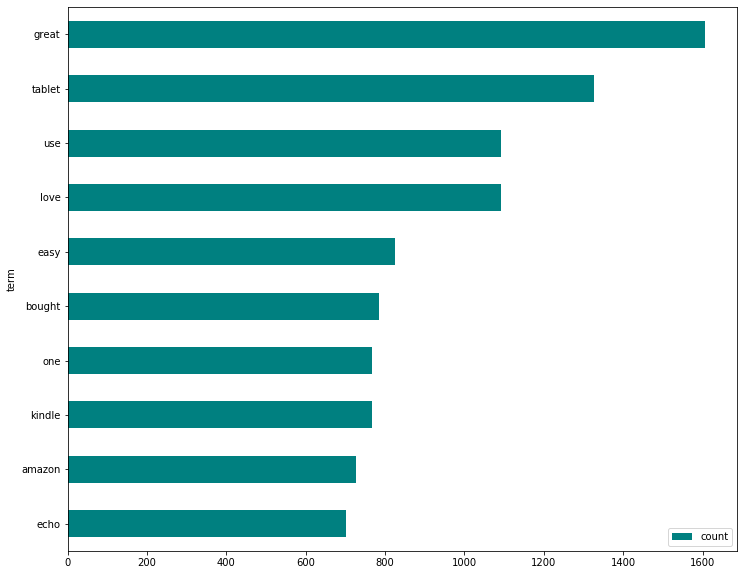

In [15]:
terms_df.sort_values(by='count', 
                     ascending=True).plot(kind="barh", 
                                          x='term', 
                                          figsize=(12,10), 
                                          color='teal')
plt.show()

In [16]:
review_cleaned = []

for review in review_data:
    sent = ""
    for word in review:
        sent = sent + word + " "
    review_cleaned.append(sent[:-1])
    
pprint(review_cleaned[:5], compact=True)

['purchased black fridaypros great price even sale powerful fast quad core '
 'processors amazing soundwell builtcons amazon ads amazon need subsidize '
 'tablet remove adds pay inability access apps except ones amazon way able '
 'accomplish add google play storenet great tablet money',
 'purchased two amazon echo plus two dots plus four fire sticks hub philips '
 'hue lamp family christmas happy purchases learning much alexa start daily '
 'routine alexa program whatever would like include news weather music '
 'horoscope also start day compliment think important alexa gave best chili '
 'recipe mean best called chili want husband use alexa stay organized business '
 'dates reminders way go',
 'average alexa option show things screen still limited',
 'good product exactly wanted good price',
 'rd one purchased bought one nieces case compares one held protected tablet '
 'many times dropping']


In [17]:
data['review_cleaned'] = review_cleaned
data.head()

,reviews.text,sentiment,review_cleaned
0,Purchased on Black FridayPros - Great Price (e...,Positive,purchased black fridaypros great price even sa...
1,I purchased two Amazon in Echo Plus and two do...,Positive,purchased two amazon echo plus two dots plus f...
2,Just an average Alexa option. Does show a few ...,Neutral,average alexa option show things screen still ...
3,"very good product. Exactly what I wanted, and ...",Positive,good product exactly wanted good price
4,This is the 3rd one I've purchased. I've bough...,Positive,rd one purchased bought one nieces case compar...


In [18]:
X = data['review_cleaned'].tolist()
y = data['sentiment'].tolist()

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state = 42)
len(X_train), len(X_test)

(3500, 1500)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

In [21]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test), digits=4))

              precision    recall  f1-score   support

    Negative     0.0000    0.0000    0.0000        29
     Neutral     0.0000    0.0000    0.0000        79
    Positive     0.9280    1.0000    0.9627      1392

    accuracy                         0.9280      1500
   macro avg     0.3093    0.3333    0.3209      1500
weighted avg     0.8612    0.9280    0.8933      1500



In [23]:
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

vect = CountVectorizer()
tfidf = TfidfTransformer()
over = RandomOverSampler()
under = RandomUnderSampler()

In [24]:
os_rf_clf = RandomForestClassifier()

pipeline = Pipeline(steps=[('vect', vect), 
                            ('tfidf', tfidf),
                            ('over', over),
                            ('clf', os_rf_clf)])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('over', RandomOverSampler()),
                ('clf', RandomForestClassifier())])

In [ ]:
#cv = StratifiedKFold()
# evaluate model
#scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
#print('Mean ROC AUC: %.3f' % mean(scores))
print(classification_report(y_test, os_rf_clf.predict(X_test), digits=4))